In [4]:
import torch
import os
import numpy as np
import csv
from PIL import Image
from transformers import CLIPImageProcessor, CLIPVisionModelWithProjection
from diffusers import AutoencoderKLTemporalDecoder, EulerDiscreteScheduler, UNetSpatioTemporalConditionModel
from omegaconf import OmegaConf

from pipelines.pipeline_stable_diffusion import StableDiffusionPipeline as StableDiffusionPipeline3DVAE
from models.modeling_vae import CVVAEModel
from diffusers import EulerDiscreteScheduler
from diffusers import StableDiffusionPipeline as StableDiffusionPipeline2DVAE

In [5]:
pretrained_path = 'stabilityai/stable-diffusion-2-1-base'
vae3d_path = 'XXXX/CV-VAE'

height = 512
width = 512
seed=42
torch.cuda.set_device('cuda:0')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Text-to-image generation result with 2D VAE


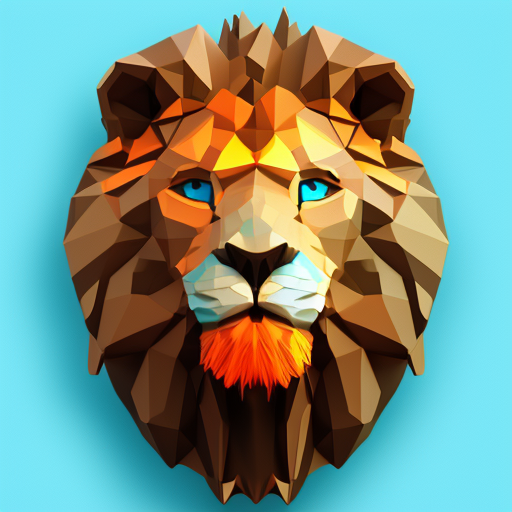

Text-to-image generation result with CV-VAE (3D)


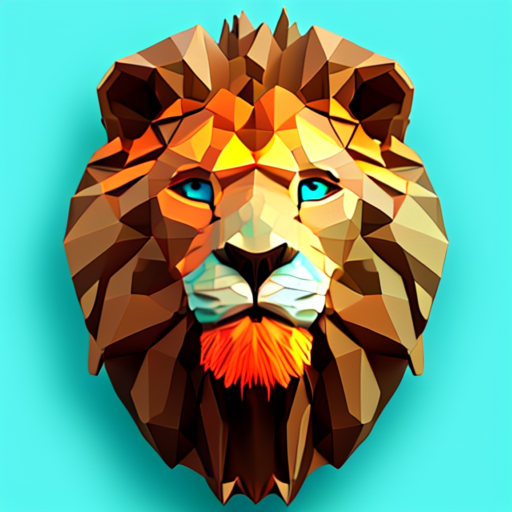

In [10]:
scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_path, subfolder="scheduler")
vae3d = CVVAEModel.from_pretrained(vae3d_path,subfolder="vae3d",torch_dtype=torch.float16)
vae3d.requires_grad_(False)
pipe_3dvae = StableDiffusionPipeline3DVAE.from_pretrained(pretrained_path,vae=vae3d, scheduler=scheduler, torch_dtype=torch.float16)
pipe_2dvae = StableDiffusionPipeline2DVAE.from_pretrained(pretrained_path, scheduler=scheduler, torch_dtype=torch.float16)

prompt = 'a lion, colorful, low-poly, cyan and orange eyes, poly- hd, 3d, low-poly game art, polygon mesh, blocky, centered composition'


pipe_3dvae = pipe_3dvae.to("cuda")
pipe_2dvae = pipe_2dvae.to("cuda")

torch.manual_seed(seed)
shape = (
    1,
    4,
    height // 8,
    width // 8,
)
latents = torch.randn(shape).to('cuda',dtype=torch.float16)

image1 = pipe_2dvae(prompt,latents=latents).images[0]
image2 = pipe_3dvae(prompt,latents=latents).images[0]

print('Text-to-image generation result with 2D VAE')
image1.show()
print('Text-to-image generation result with CV-VAE (3D)')
image2.show()